# **HW2: Linear Algebra and Probability Using NumPy**

#### **Attention:** *This assignment is to be completed individually. Group work is not permitted.*

### **Steven Yoo**

In this assignment, you'll apply concepts from linear algebra and probability. Please import all necessary libraries and your dataset before beginning.

In [1]:
# Import the libraries here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Linear Algebra Using the USA Housing Dataset**

**Load the Dataset: Read the dataset `USA_Housing.csv` into a pandas dataframe.**

In [2]:
df = pd.read_csv('USA_Housing.csv', index_col=False)

### **Mount Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Question 1**
Create a matrix \( M \) consisting of the first 5 numerical columns of the dataset. Print its dimensions.

In [4]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
M = np.array([df[numerical_columns[:-1]]])
M.shape

(1, 5000, 5)

#### **Question 2**
Compute the rank of matrix \( M \).

In [5]:
np.linalg.matrix_rank(M)

array([5])

#### **Question 3**
Extract the `Price` column as a vector \( p \). Compute the dot product of the matrix \( M \) (transposed) and vector \( p \). What does this represent (write 1-2 sentences)?

In [6]:
p = np.array([df['Price']])
np.dot(M.transpose(), p)

array([[[8.42413100e+10, 1.19786783e+11, 8.42376851e+10, ...,
         8.19898574e+10, 9.53477106e+10, 1.03325612e+11],
        [8.39269718e+10, 1.19339811e+11, 8.39233604e+10, ...,
         8.16839202e+10, 9.49919299e+10, 1.02940062e+11],
        [6.49050608e+10, 9.22916377e+10, 6.49022680e+10, ...,
         6.31703932e+10, 7.34621643e+10, 7.96088653e+10],
        ...,
        [6.71328647e+10, 9.54594595e+10, 6.71299760e+10, ...,
         6.53386563e+10, 7.59836825e+10, 8.23413632e+10],
        [7.20156918e+10, 1.02402587e+11, 7.20125929e+10, ...,
         7.00909838e+10, 8.15102630e+10, 8.83303619e+10],
        [6.93779045e+10, 9.86517900e+10, 6.93749192e+10, ...,
         6.75236947e+10, 7.85247091e+10, 8.50950017e+10]],

       [[6.01834084e+06, 8.55776923e+06, 6.01808188e+06, ...,
         5.85749328e+06, 6.81180078e+06, 7.38175544e+06],
        [6.35727234e+06, 9.03971228e+06, 6.35699879e+06, ...,
         6.18736642e+06, 7.19541711e+06, 7.79746959e+06],
        [6.21217419e+06, 

**The dot product represents the sum of the product of the ith componenet of M and the ith component of p. Since the dot product is not 0, we can conclude that M and p are not perpendicular.**

## **Probability**

#### **Question 4**
Suppose houses are classified as "High-Price" if their prices are above the 90th percentile of all house prices in the dataset. What is the probability that a randomly selected house from the dataset is "High-Price"?

Here's how you can solve this using NumPy:

* Calculate the 90th percentile price.
* Count the number of houses with prices above this value.
* Divide this count by the total number of houses to get the probability.

In [7]:
percentile_90_price = np.percentile(df['Price'].dropna(), 90)


high_price_count = np.sum(df['Price'] > percentile_90_price)

# Compute the probability
probability_high_price = high_price_count / len(df.dropna(subset=['Price']))

# print(f"90th Percentile Price: ${percentile_90_price:.2f}")
# print(f"Number of High-Price Houses: {high_price_count}")
print(f"Probability of a House Being High-Price: {probability_high_price:.4f}")


# The probability value of 0.1000 (or  10 %) indicates that there is a
# 10% chance that a randomly selected house from the dataset will be classified as "High-Price".

Probability of a House Being High-Price: 0.1000


**There is a 10% chance that a randomly selected house will be 'High-Price'**

#### **Question 5**
Compute the correlation between `Avg. Area Income` and `Price`. Also, write in 1-2 sentences below your code cell about what you infer from this correlation value.

PS: You can use `corr()` method here.

In [8]:
correlation_income_price = df['Avg. Area Income'].corr(df['Price'])
print(f"Correlation between 'Avg. Area Income' and 'Price': {correlation_income_price}")

Correlation between 'Avg. Area Income' and 'Price': 0.6397337782498941


**The correlation value of 0.64 indicates that Avg. Area Income and Price have a moderately strong correlation to each other. There is a positive correlation, indicating that an increase in Avg. Area Income will generally increase Price.**

## **Visualization**

* All plots should have a title and appropriate labels.

#### **Question 6**
Generate a histogram for `Avg. Area House Age`. Describe its distribution in 1-2 sentences.

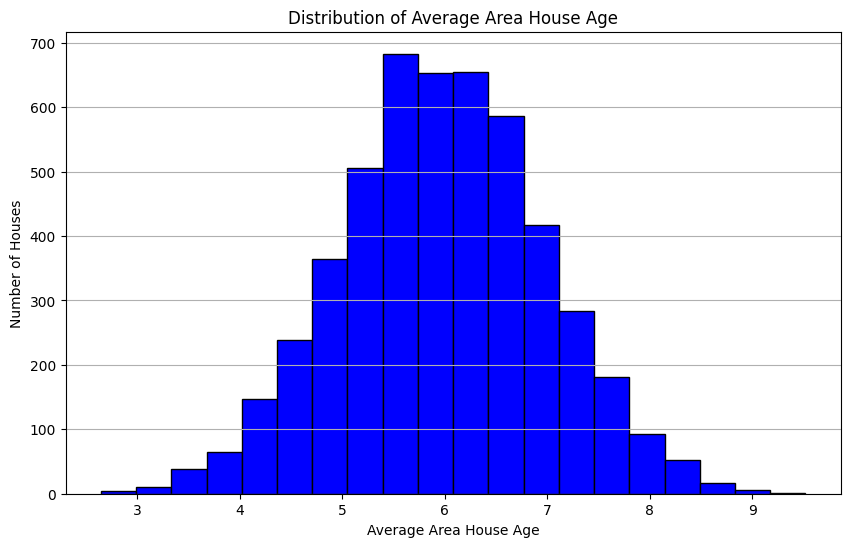

In [9]:
plt.figure(figsize=(10, 6))

plt.hist(df['Avg. Area House Age'].dropna(), bins = 20, color='blue', edgecolor='black')

plt.title('Distribution of Average Area House Age')
plt.xlabel('Average Area House Age')
plt.ylabel('Number of Houses')

plt.grid(True, axis='y')

plt.show()

**The distribution of average area house age is close to normal. The highest frequency of avg. area house age occurs around the mean (~6), and frequency drops left and right of the mean.**

#### **Question 7**
Generate a scatter plot between `Avg. Area Income` and `Price`. What does the relationship look like (write 1-2 sentences)?

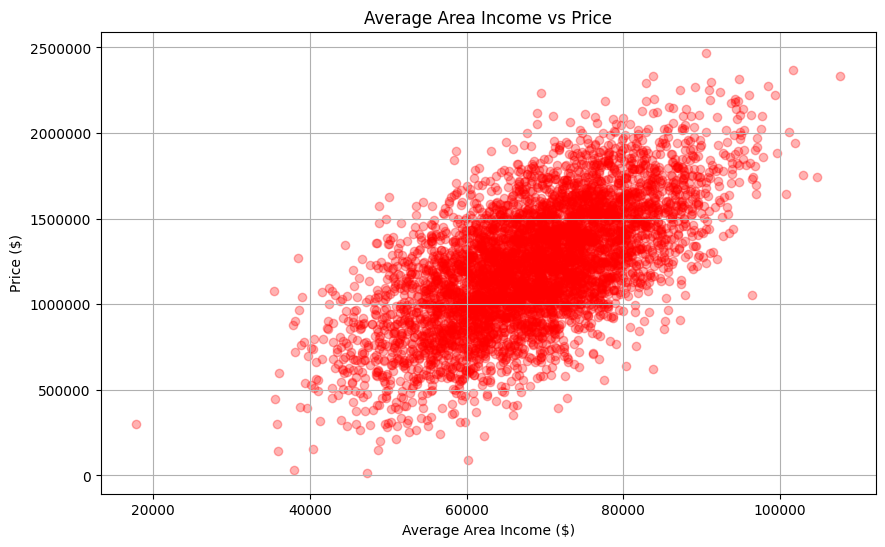

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Avg. Area Income'], df['Price'], alpha=0.3, color='red')

plt.title('Average Area Income vs Price')
plt.xlabel('Average Area Income ($)')
plt.ylabel('Price ($)')
plt.ticklabel_format(style='plain') # remove scientific notation

plt.grid(True)

**There seems to be a relatively strong positive correlation between avg. area income and price. Generally, as avg. area income increases, price also increases.**

### **Question 8**

Plot a heatmap showing the correlation between the numerical columns in the dataset. Which two factors have the highest correlation with the 'Price'?

You can choose to use either `seaborn` or `matplotlib` here.

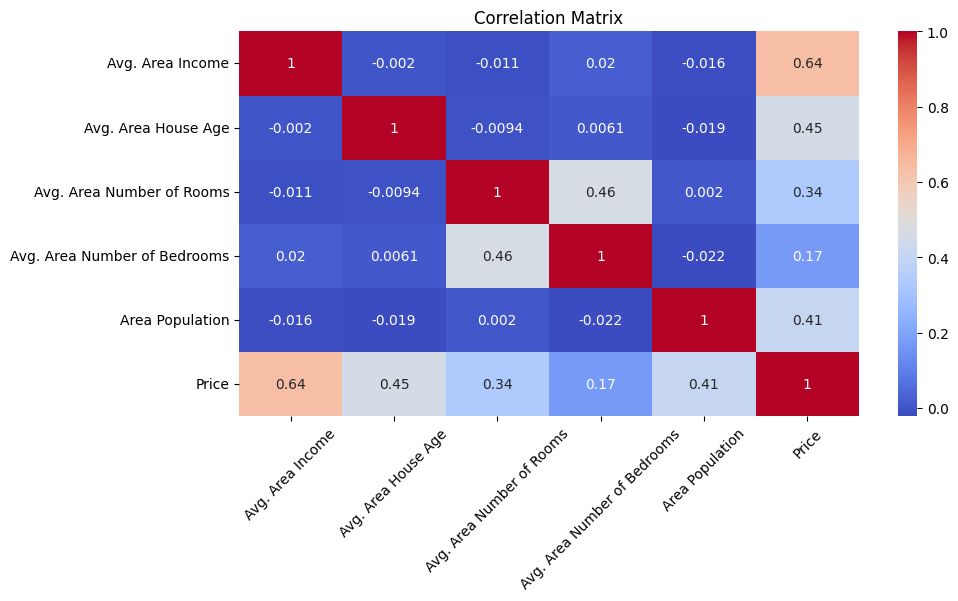

In [11]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

correlation_matrix = np.corrcoef(df[numerical_columns].dropna().values, rowvar=False)

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=numerical_columns, yticklabels=numerical_columns)
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.show()

**Average Area Income and Average Area Number of Rooms have the highest correlation with Price.**